Ok so there are three samples, which look like backcrosses in the RADseq NEWHYBRIDS analyses. Our theory is that backcrossing is associated with a change in ploidy, so I want to check to see if these samples have any plody differences. 

The approach is this:

1) Find species specific alleles for crucian and gibel.  
2) Look at the allele specific coverage at these loci in the hybrids

I should see that the allele depth ratio between alleles is much higher in triploids than diploids, so if any samples were diploid, they should stand out. 



To find loci with species specific SNPs, I will look for loci with an Fst of 1 between crucian and gibel. I will do this with the Fst file for cru and gib from populations 

In [31]:
from __future__ import division

In [12]:
cru_gib_fsts = open("/home/djeffrie/Data/RADseq/Crucian/New_Stacks_triploids/Populations_cru_gibel/batch_1.fst_Ccar-Cgib.tsv", 'r')
count =0
fixed = []
for line in cru_gib_fsts.readlines():
    if not line.startswith("#"):
        Locus_ID = "%s_%s" % (line.split()[1], line.split()[6])
        Fst = line.split()[8]
        if float(Fst) == 1:
            count += 1
            fixed.append(Locus_ID)
print "%s fixed SNPs" % count

1304 fixed SNPs


So there are ~1300 fixed SNPs out of a possible 1720! Thats a lot! 

I wonder if there is a problem with the sampling here, I only have very few gibel, so it is likely that I am not picking up all of their diversity. Thus, what looks fixed in gibel is likely just poorly sampled diversity. 

But there is nothing I can do about it. . . . I will keep going from here with these "species specific" SNPs


In [51]:
import vcf

#myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Crucian/New_Stacks_triploids/Populations_cru_gibel/batch_1.vcf", 'r'))
record = myvcf.next()

record.ID

'377_28'

In [38]:
import vcf

myvcf = vcf.Reader(open("/home/djeffrie/Data/RADseq/Crucian/New_Stacks_triploids/Populations_cru_gibel/batch_1.vcf", 'r'))

sample_cov_ratios = {}

for record in myvcf:
    if record.ID in fixed:
        for sample in record.samples:
            if sample.sample not in sample_cov_ratios:
                sample_cov_ratios[sample.sample] = []
            if sample.is_het:
                cov_ratio = max(sample["AD"])/min(sample["AD"])
                sample_cov_ratios[sample.sample].append(cov_ratio)


In [52]:
import numpy as np



for sample in sample_cov_ratios:
    sample
    if len(sample_cov_ratios[sample]) > 0:
        print sample, np.mean(sample_cov_ratios[sample])
        

FIN2_39 2.06944444444
HUN4_10 1.63839285714
HUN4_16 1.31706896552
HUN4_15 1.32052696078
SWE20_6 1.27008547009
HUN2_8 1.47142857143
HUN2_9 1.35352494727
SWE20_8 1.94947977262
SWE20_7 1.96724374845
FIN2_35 1.48075705975
HUN2_7 1.6
HUN2_5 1.27478632479
HUN2_3 1.83333333333
HUN2_1 1.66287878788
HUN4_2 1.03869047619
FIN2_38 1.52164681065
FIN2_34 1.3644679751
FIN2_36 1.32160675697
FIN2_37 1.42510710365
SWE20_11 1.85422185937
HUN4_8 1.22524760602


In [55]:
help(plt.violinplot)

Help on function violinplot in module matplotlib.pyplot:

violinplot(dataset, positions=None, vert=True, widths=0.5, showmeans=False, showextrema=True, showmedians=False, points=100, bw_method=None, hold=None, data=None)
    Make a violin plot.
    
    Make a violin plot for each column of *dataset* or each vector in
    sequence *dataset*.  Each filled area extends to represent the
    entire data range, with optional lines at the mean, the median,
    the minimum, and the maximum.
    
    Parameters
    ----------
    dataset : Array or a sequence of vectors.
      The input data.
    
    positions : array-like, default = [1, 2, ..., n]
      Sets the positions of the violins. The ticks and limits are
      automatically set to match the positions.
    
    vert : bool, default = True.
      If true, creates a vertical violin plot.
      Otherwise, creates a horizontal violin plot.
    
    widths : array-like, default = 0.5
      Either a scalar or a vector that sets the maximal 

In [77]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, hold=None, data=None, **kwargs)
    Make a scatter plot of `x` vs `y`.
    
    Marker size is scaled by `s` and marker color is mapped to `c`.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        Input data
    
    s : scalar or array_like, shape (n, ), optional
        size in points^2.  Default is `rcParams['lines.markersize'] ** 2`.
    
    c : color, sequence, or sequence of color, optional, default: 'b'
        `c` can be a single color format string, or a sequence of color
        specifications of length `N`, or a sequence of `N` numbers to be
        mapped to colors using the `cmap` and `norm` specified via kwargs
        (see below). Note that `c` should not be a single numeric RGB or
        RGBA sequence because that is indistinguishable from an arra

In [114]:
samples = []

for sample in sample_cov_ratios:
    if len(sample_cov_ratios[sample]) > 10:
        samples.append(sample)

In [ ]:
(1, 10)

In [103]:
for thing in vio["cmeans"]:
    

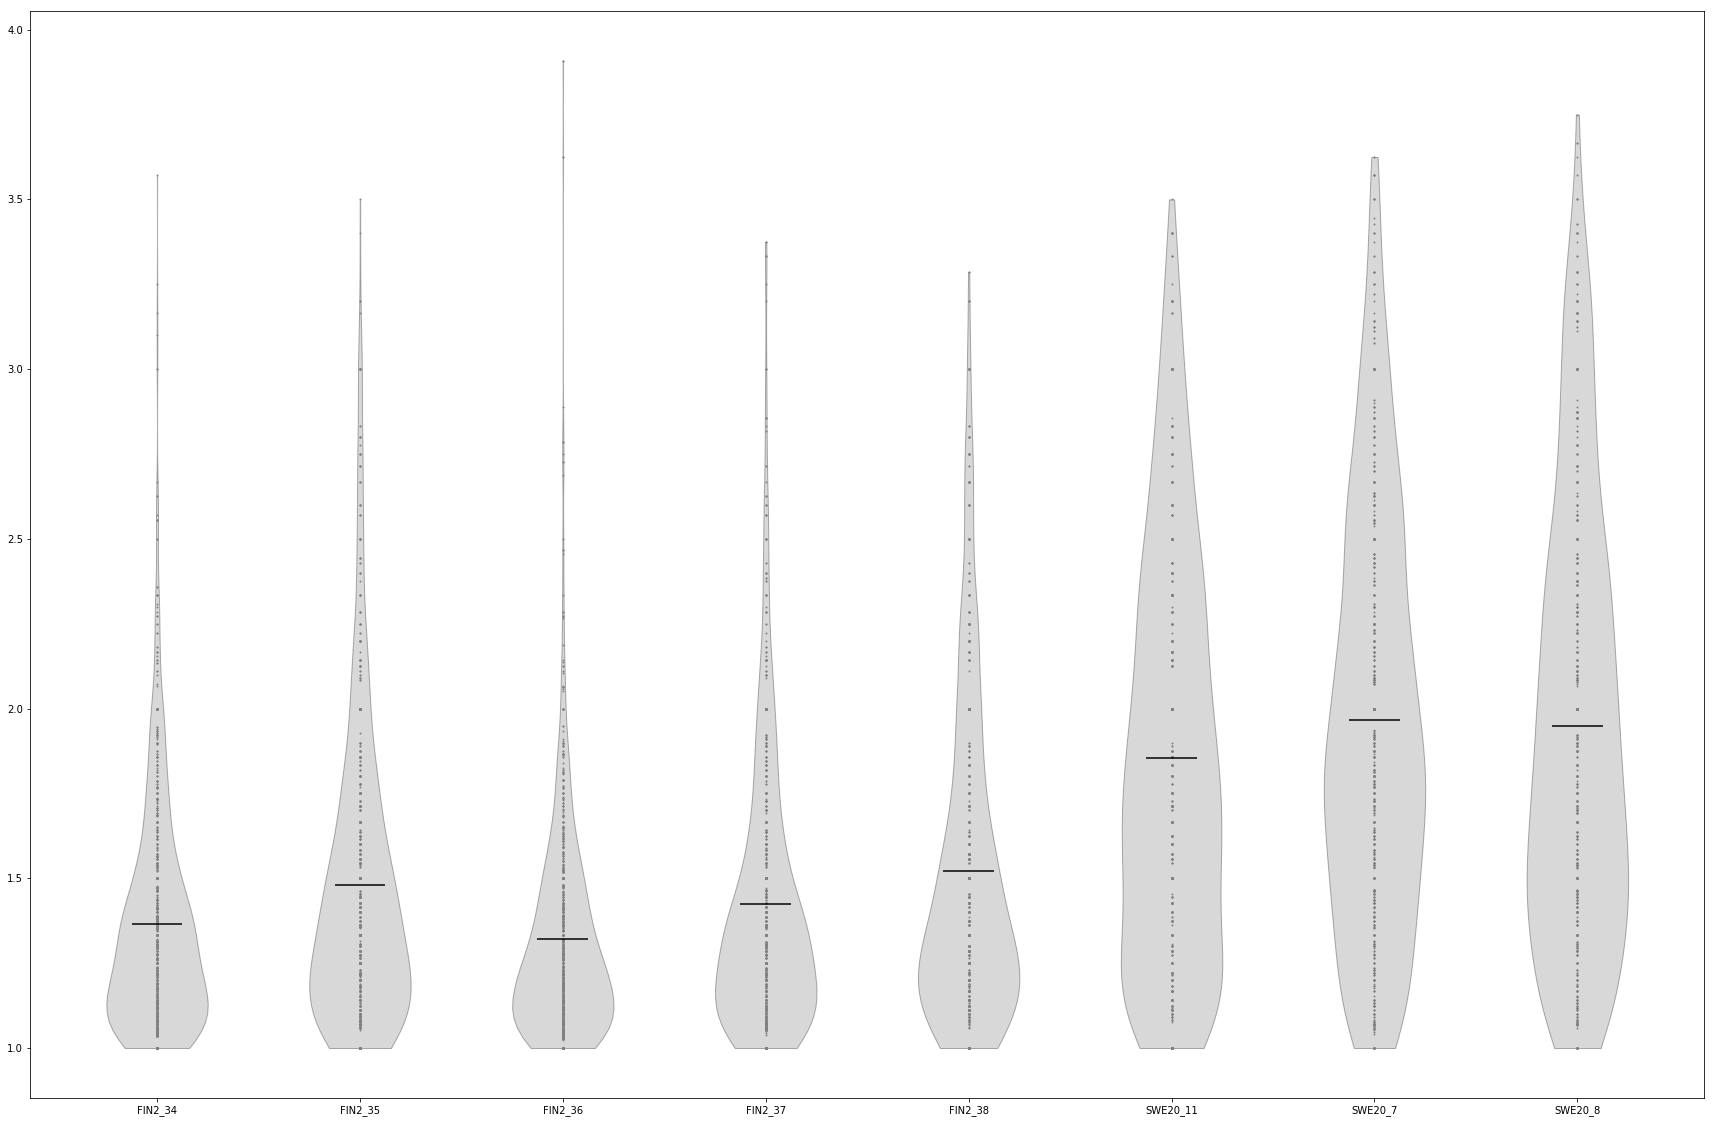

In [115]:
from matplotlib import pyplot as plt

plt.figure(figsize = (30,20))

x_coord = 1
xcoords = []

for sample in sorted(samples):
    if len(sample_cov_ratios[sample]) > 10:
        xcoords.append(x_coord)
        vio = plt.violinplot(sample_cov_ratios[sample], positions = [x_coord], showmeans = True, showextrema = False)
        for pc in vio["bodies"]:
            pc.set_facecolor('grey')
            pc.set_edgecolor('Black')
        vio["cmeans"].set_edgecolor("Black")
        plt.scatter([x_coord]*len(sample_cov_ratios[sample]), sample_cov_ratios[sample], s = 0.8, c = "grey")
        x_coord += 1

    
plt.xticks(xcoords, sorted(samples))
        
plt.show()

Ok, so I think its worked well - limiting the analyses only to samples which have > 10 loci which are both fixed between species and heterozygous in the hybrids was the trick, box plots only make sense when made with >10 or so loci. 

So this is ready to go in as a Supp fig to the paper I think!
